In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [2]:
data_year_all = pd.read_csv("D:/Data-Analysis/Stock Market/TCS_YEAR_ALL.csv")
data_year_all

,Year,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,DematFlagExist
0,2004,1076.00,1338.00,958.55,1335.50,47397004,1162694,51266914295,12109331,25.55,379.45,259.50,NaN
1,2005,1349.80,1750.85,1091.00,1702.45,63160750,1422277,84809899203,20531913,32.51,659.85,352.65,NaN
2,2006,1707.00,2099.00,900.00,1218.60,57116956,1640999,79851718555,29973413,52.48,1199.00,-488.40,NaN
3,2007,1250.00,1399.00,935.00,1083.35,79522052,1747807,92570784422,50158624,63.08,464.00,-166.65,NaN
4,2008,1065.10,1078.00,418.00,478.10,75871717,2106962,56944484110,28717825,37.85,660.00,-587.00,NaN
5,2009,485.00,805.00,355.25,749.75,108462189,2084765,60476861965,39724991,36.63,449.75,264.75,NaN
6,2010,750.70,1179.00,692.00,1165.05,62694021,1396016,53121079184,26982541,43.04,487.00,414.35,NaN
7,2011,1165.00,1247.00,902.90,1161.25,50122536,1903284,55627676107,16354716,32.63,344.10,-3.75,NaN
8,2012,1155.15,1438.00,1046.55,1258.55,35695684,1362552,43607787115,14942552,41.86,391.45,103.40,NaN
9,2013,1268.00,2258.05,1255.00,2170.95,31269625,1672640,52925555188,12284320,39.29,1003.05,902.95,NaN


In [3]:
data_year_loss = data_year_all[data_year_all['Spread Close-Open']<0]

In [4]:
del_qty = np.array(data_year_all['Deliverable Quantity'])
del_qt_pr = np.array(data_year_all['% Deli. Qty to Traded Qty'])

traded_qty = (del_qty/del_qt_pr)*100
print(traded_qty)

[4.73946419e+07 6.31556844e+07 5.71139729e+07 7.95158909e+07
 7.58727213e+07 1.08449334e+08 6.26917774e+07 5.01217162e+07
 3.56964931e+07 3.12657674e+07 2.35898657e+07 1.98056232e+07
 2.24558989e+07 2.09773024e+07 3.18608098e+07]


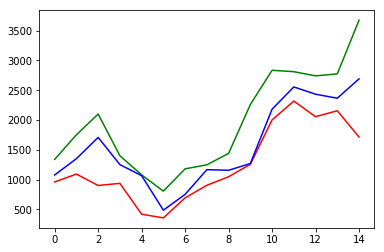

In [5]:
plt.plot(data_year_all['High Price'], "-g")
plt.plot(data_year_all['Low Price'], "-r")
plt.plot(data_year_all['Open Price'], "-b")

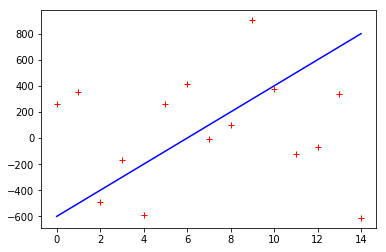

In [43]:
x = np.array([i for i in range(-600,900,100)])
plt.plot(x, "-b", data_year_all['Spread Close-Open'], "+r")

In [44]:
#ftr_op_cl = GaussianNB()
#pred_op_cl = ftr_op_cl.fit(np.array(data_year_all['Year']).reshape(-1, 1), np.array(data_year_all['Spread Close-Open']))

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_year = np.array(data_year_all['Year'])
train_c_o = np.array(data_year_all['Spread Close-Open'])
regr.fit(train_year.reshape(-1, 1), train_c_o)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
coef = regr.coef_
incpt = regr.intercept_

In [50]:
test_year = np.array([i for i in range(2019,2034)])
test_c_o = np.array([])
print(test_year, test_c_o, sep="\n")

[2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032
 2033]
[]


[61.74904762 61.4747619  61.20047619 60.92619048 60.65190476 60.37761905
 60.10333333 59.82904762 59.5547619  59.28047619 59.00619048 58.73190476
 58.45761905 58.18333333 57.90904762]


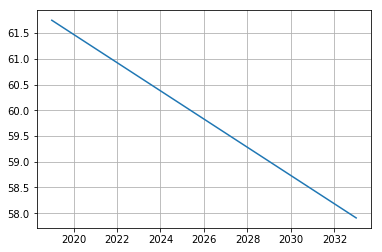

In [51]:
test_c_o = coef*test_year + incpt
print(test_c_o)
plt.grid()
plt.plot(test_year, test_c_o)

In [52]:
mean_err = np.mean((regr.predict(test_c_o.reshape(-1,1)) - train_c_o)**2)
score = regr.score(test_year.reshape(-1,1), test_c_o.reshape(-1,1))

print(mean_err, score, sep="\n")

450120.67177418957
1.0


In [61]:
log_train_c_o = np.array(list(map(lambda x: x>0, train_c_o)))
print(log_train_c_o)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(train_year.reshape(-1,1), log_train_c_o.reshape(-1,1))

[ True  True False False False  True  True False  True  True  True False
 False  True False]


C:\Users\Anirban\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [64]:
log_coef = logistic.coef_
log_incpt = logistic.intercept_

print(log_coef, log_incpt, sep="\n")

[[6.61352427e-05]]
[3.31497886e-08]


[[0.53333229]
 [0.53334875]
 [0.53336521]
 [0.53338167]
 [0.53339813]
 [0.53341459]
 [0.53343105]
 [0.53344751]
 [0.53346397]
 [0.53348043]
 [0.53349689]
 [0.53351335]
 [0.53352981]
 [0.53354627]
 [0.53356272]]


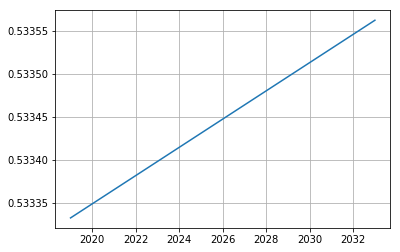

In [68]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

test_c_o = np.array(list(map(lambda x: sigmoid(log_coef*x)+log_incpt , test_year)))
print(test_c_o)
plt.grid()
plt.plot(test_year, test_c_o)

